# Jan Izydorczyk
# Sprawozdanie 4

In [1]:
from numpy import float32,float64,log2
import sys
from matplotlib import pyplot as plt
import math
import numpy as np
import random
import scipy
%matplotlib notebook

print("Wersja Pythona:")
print (sys.version)
print(f"Wersja numpy: {np.__version__}")
print("Konfiguracja liczb zmiennoprzecinkowych")
print(sys.float_info)

f64 = np.float64
f32 = np.float32

Wersja Pythona:
3.9.4 (tags/v3.9.4:1f2e308, Apr  6 2021, 13:40:21) [MSC v.1928 64 bit (AMD64)]
Wersja numpy: 1.20.2
Konfiguracja liczb zmiennoprzecinkowych
sys.float_info(max=1.7976931348623157e+308, max_exp=1024, max_10_exp=308, min=2.2250738585072014e-308, min_exp=-1021, min_10_exp=-307, dig=15, mant_dig=53, epsilon=2.220446049250313e-16, radix=2, rounds=1)


# Zadanie 1

In [2]:
def get_simpson(f, left, right):
    h = (right - left) / 2
    mid = left + h
    return 2 * h * (f(left) + 4 * f(mid) + f(right)) / 6

## 1 a)

In [3]:
def get_simpson_and_monomial_diff(degree):
    l, r = 0, 2
    simp_res = get_simpson(lambda x: x**degree, l, r)
    prop_res = (r**(degree + 1) - l**(degree + 1)) / (degree + 1)
    return abs(simp_res - prop_res) 

In [4]:
print(get_simpson_and_monomial_diff(1))

0.0


In [5]:
print(get_simpson_and_monomial_diff(2))

0.0


In [6]:
print(get_simpson_and_monomial_diff(3))

0.0


In [7]:
print(get_simpson_and_monomial_diff(4))

0.2666666666666666


In [8]:
print(get_simpson_and_monomial_diff(5))

1.333333333333334


Simpson jest w stanie dobrze wyliczac stopień $n + 1$, czyli do trzeciego stopnia włącznie.

## 1 b)

In [9]:
def expsin(x):
    return np.sin(4*x)*np.exp(-3 * x)

In [10]:
print(get_simpson(expsin, 0 , 5))

-0.0010027325181523321


In [11]:
print(get_simpson(expsin, 1 , 5) + get_simpson(expsin, 0 , 1))

0.10368557622593552


Wynika to z tego, że dla większej liczby przedziałów suma odzielnych błędów jest mniejsza niż pojedyńczy błąd na całym przedziale, co za tym idzie wartość kwadratury też musi się zmienić. Funkcja jest tak dobrana, że różnica jest znaczna.

## 1 c)

In [12]:
from scipy import interpolate

In [13]:
xs = np.linspace(0, 5, 3)
ys = expsin(xs)
f_inter = interpolate.interp1d(xs, ys, kind='quadratic')

In [14]:
def plot_aprox_and_inter(f, f_inter, left, right):
    xs_range = np.linspace(left, right, 1000)
    ys_range = f(xs_range)
    plt.plot(xs_range, ys_range, label = 'Function')
    ys_range = f_inter(xs_range)
    plt.plot(xs_range, ys_range, label = 'Interpolation')
    plt.legend()

<IPython.core.display.Javascript object>


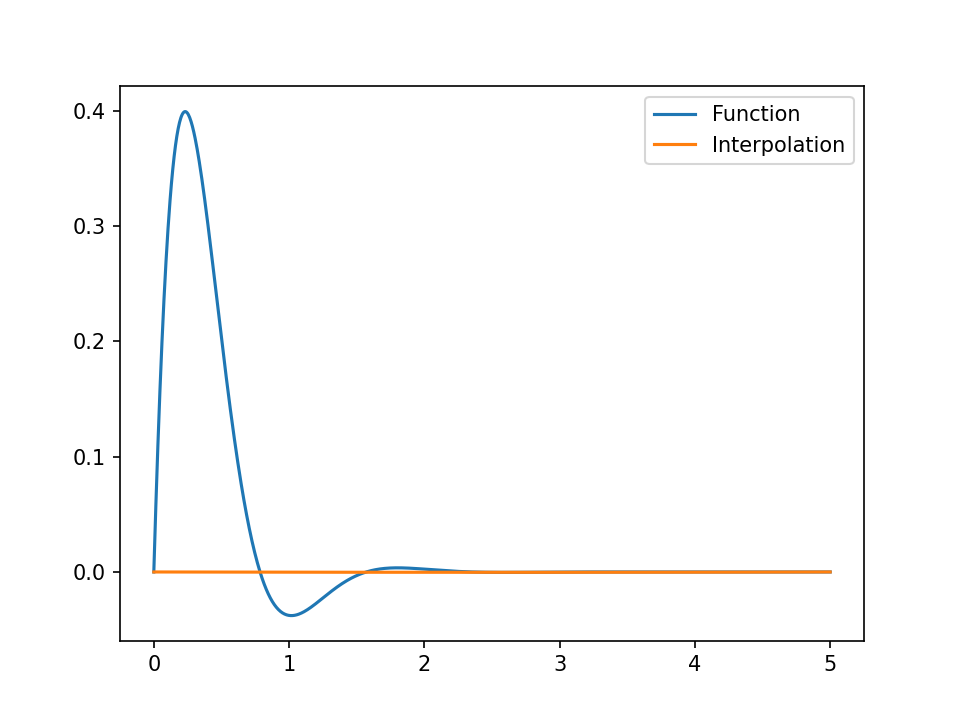

In [15]:
plot_aprox_and_inter(expsin, f_inter, 0, 5)

In [16]:
def plot_inters(f, fs_inter, nodes):
    left, right = nodes[0], nodes[-1]
    xs_range = np.linspace(left, right, 1000)
    ys_range = f(xs_range)
    
    fig, axs = plt.subplots(1, 3, figsize=(10, 3), sharey=True)
    axs[0].title.set_text('Function')
    axs[1].title.set_text('Spline Interpolation')
    axs[2].title.set_text('Both')
    
    axs[0].plot(xs_range, ys_range)
    axs[2].plot(xs_range, ys_range)
    for i, f_inter in enumerate(fs_inter):
        left, right = nodes[i], nodes[i + 1]
        xs_range = np.linspace(left, right, 1000)
        ys_range = f_inter(xs_range)
        axs[1].plot(xs_range, ys_range)
        axs[2].plot(xs_range, ys_range)        

<IPython.core.display.Javascript object>


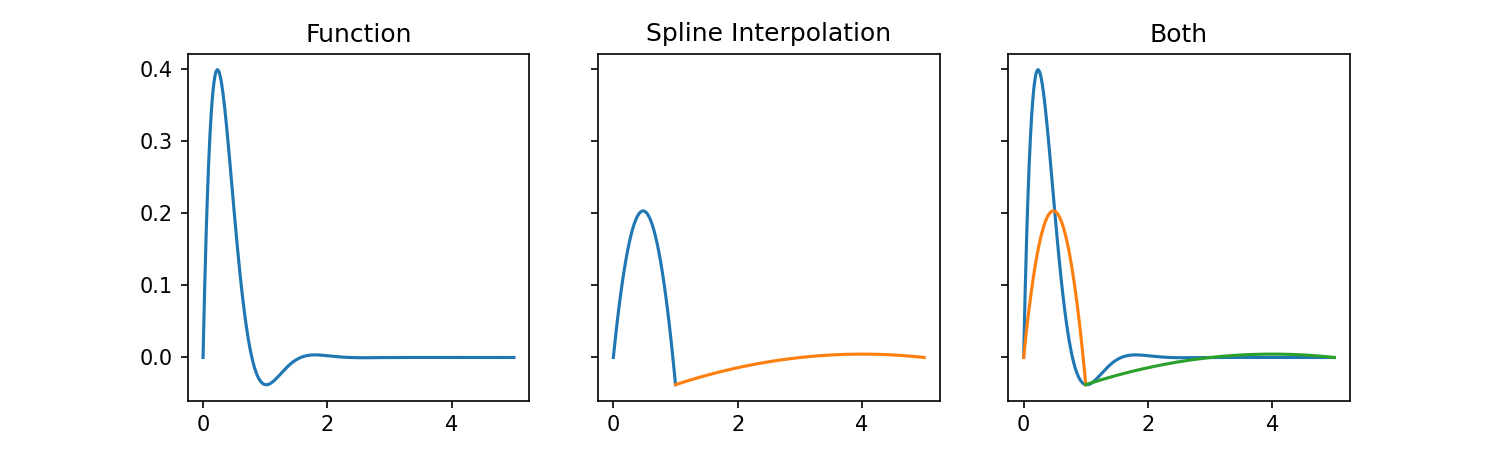

In [17]:
xs = np.linspace(0, 1, 3)
ys = expsin(xs)
f_1 = interpolate.interp1d(xs, ys, kind='quadratic')

xs = np.linspace(1, 5, 3)
ys = expsin(xs)
f_2 = interpolate.interp1d(xs, ys, kind='quadratic')
plot_inters(expsin, [f_1, f_2], [0, 1, 5])

Jest to wielomian z kotrego jest liczona analitycznie całka oznaczona w metodzie Simpsona, która ma przybliżać całkę oznaczoną zadanej funkcji.

# Zadanie 2

In [18]:
def adaptive_simpson(f, left, right, epsilon, last_value=None, intervals=[]):
    if last_value is None:
        intervals = [left]
        last_value = get_simpson(f, left, right)
    mid = (right + left) / 2
    left_value = get_simpson(f, left, mid)
    right_value = get_simpson(f, mid, right)
    if abs(left_value + right_value - last_value) < 15 * epsilon:
        intervals.append(right)
    else:
        left_value, _ = adaptive_simpson(f, left, mid, epsilon / 2, left_value, intervals)
        right_value, _ = adaptive_simpson(f, mid, right, epsilon / 2, right_value, intervals)
    return left_value + right_value, intervals

## 2 a)

In [35]:
def compare_adptive_and_classic_simpson(f, left, right, epsilon): 
    value, ints = adaptive_simpson(expsin, left, right, epsilon)
    clas_value = get_simpson(f, left, right)
    print(f'For epsilon = \t{epsilon}:\n Simpson = \t{clas_value}\n Adaptive = \t{value}\n Difference = \t{abs(clas_value - value)}\nNumber of intervals = \t {len(ints)}.')

In [36]:
compare_adptive_and_classic_simpson(expsin, 0, 5, 1e-2)

For epsilon = 	0.01:
 Simpson = 	-0.0010027325181523321
 Adaptive = 	-0.03782275644650306
 Difference = 	0.03682002392835073
Number of intervals = 	 2.


In [37]:
compare_adptive_and_classic_simpson(expsin, 0, 5, 1e-3)

For epsilon = 	0.001:
 Simpson = 	-0.0010027325181523321
 Adaptive = 	0.16010848487812365
 Difference = 	0.16111121739627599
Number of intervals = 	 6.


In [38]:
compare_adptive_and_classic_simpson(expsin, 0, 5, 1e-4)

For epsilon = 	0.0001:
 Simpson = 	-0.0010027325181523321
 Adaptive = 	0.1600312230616263
 Difference = 	0.16103395557977862
Number of intervals = 	 8.


In [39]:
compare_adptive_and_classic_simpson(expsin, 0, 5, 1e-5)

For epsilon = 	1e-05:
 Simpson = 	-0.0010027325181523321
 Adaptive = 	0.16004511152737097
 Difference = 	0.1610478440455233
Number of intervals = 	 15.


Metoda adaptywna pozwoliła nam na znaczną poprawę precyzji, adaptywnie zwiększając liczbe przedziałów.

## 2 b)

In [40]:
value, ints = adaptive_simpson(expsin, 0, 5, 1e-3)
print(ints)

[0, 0.3125, 0.625, 1.25, 2.5, 5]


In [41]:
def plot_adaptive_simpson(f, left, right, epsilon): 
    value, ints = adaptive_simpson(f=expsin, left=left, right=right, epsilon=epsilon)
    print(ints)
    ints = np.array(ints)
    fs = [ interpolate.interp1d([l, (l + r) / 2, r], [f(l), f((l + r) / 2), f(r)], kind='quadratic') for (l, r) in zip(ints[:-1], ints[1:])]
    plot_inters(expsin, fs, ints)

[0, 5]


<IPython.core.display.Javascript object>


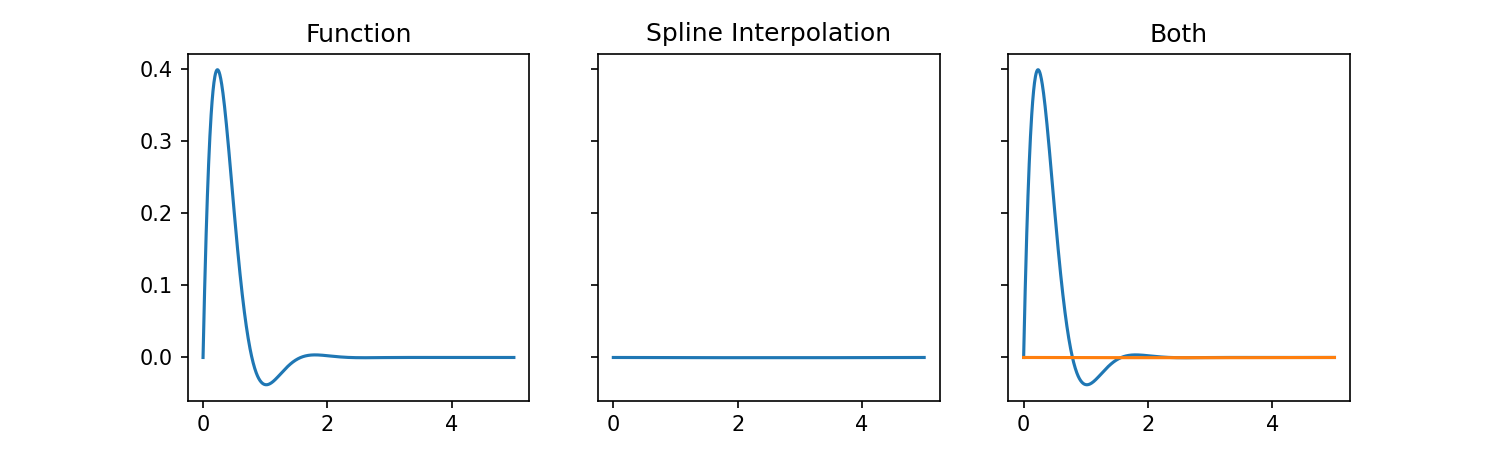

In [42]:
plot_adaptive_simpson(expsin, 0, 5, 1e-2)

[0, 0.625, 1.25, 2.5, 5]


<IPython.core.display.Javascript object>


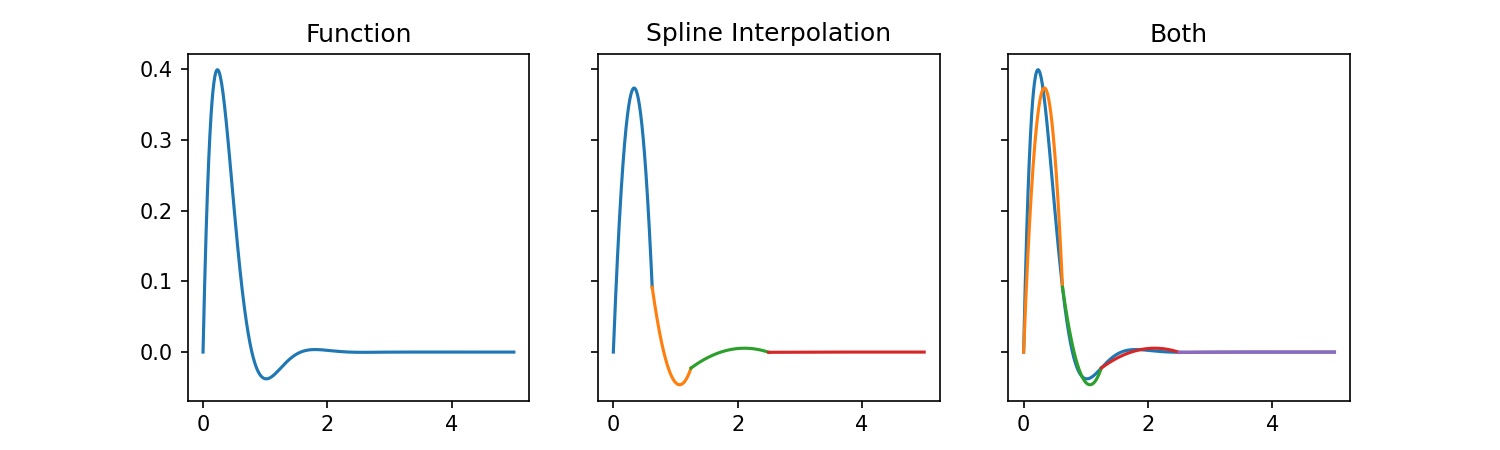

In [27]:
plot_adaptive_simpson(expsin, 0, 5, 2.2e-3)

[0, 0.3125, 0.625, 1.25, 2.5, 5]


<IPython.core.display.Javascript object>


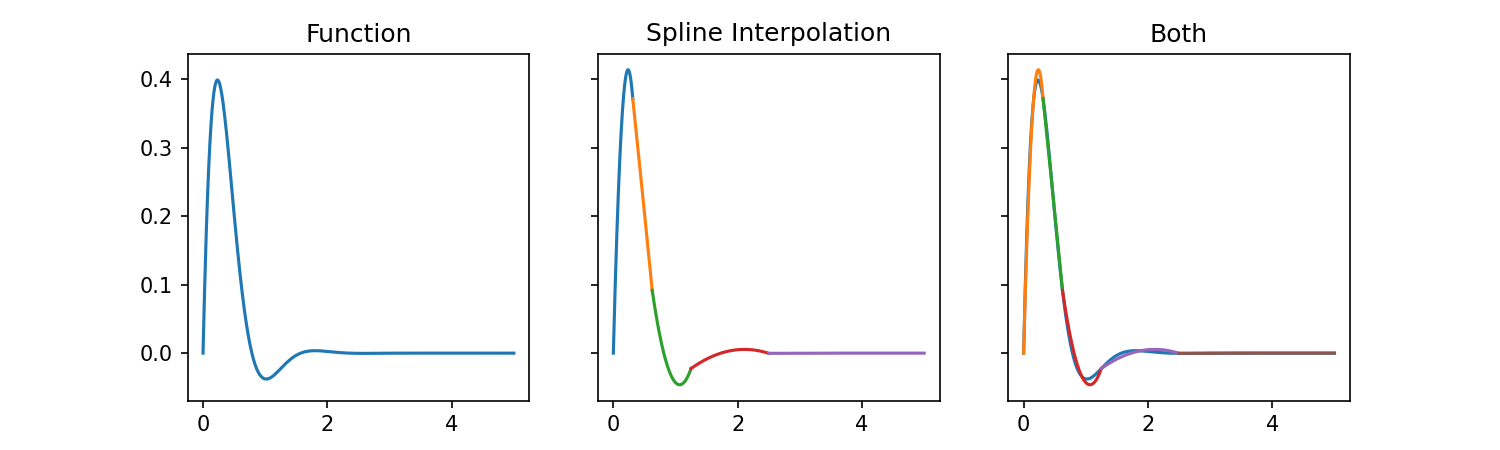

In [66]:
plot_adaptive_simpson(expsin, 0, 5, 1e-3)

[0, 0.078125, 0.15625, 0.234375, 0.3125, 0.390625, 0.46875, 0.546875, 0.625, 0.703125, 0.78125, 0.9375, 1.09375, 1.25, 1.40625, 1.5625, 1.875, 2.03125, 2.1875, 2.5, 2.8125, 3.125, 3.75, 5]


<IPython.core.display.Javascript object>


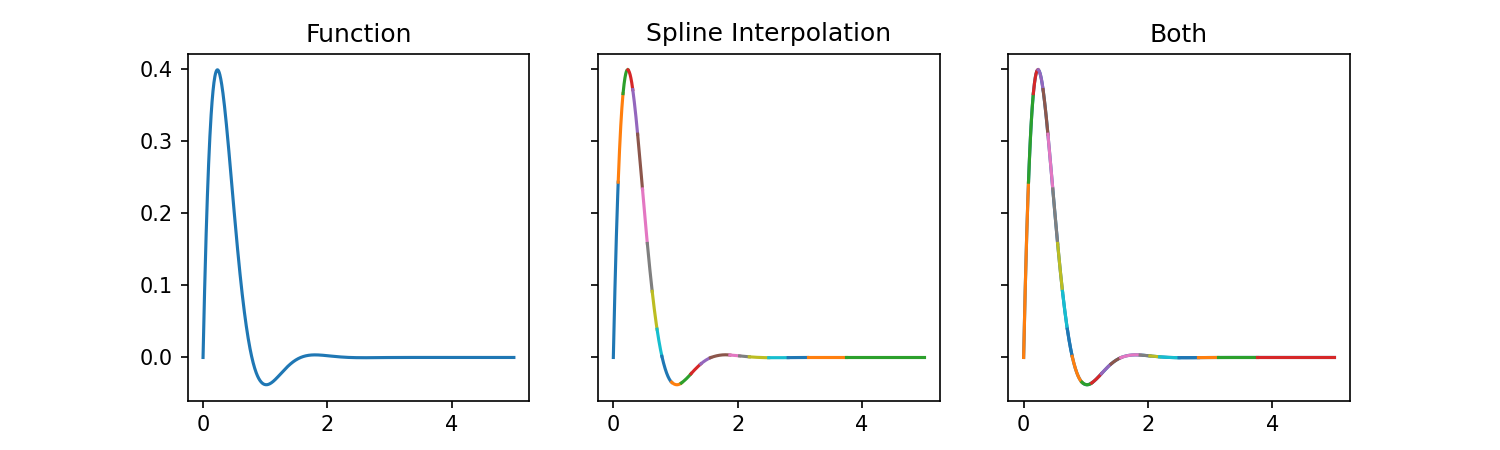

In [67]:
plot_adaptive_simpson(expsin, 0, 5, 1e-6)

Wraz z zmniejszaniem wartości dopuszczalnego błędu $\epsilon$ funkcja znajdowała coraz mniejsze przedziały, a same fukcje kwadratowe coraz lepiej przybliżały zadaną funkję. Warto zauważyć że dla $x > 2$ przedziałów jest mniej. Wynika to z tego, że fukcja w tym przedziale nie zmienai się aż tak gwałtownie, co sprawia, że metoda adaptacyjna nie musi aż tak dzielić tego odcinka.  

# Zadanie 3

In [28]:
orto_polys = [np.poly1d([1]), np.poly1d([1, 0])]
def get_ortogonal(k):
    if len(orto_polys) < k:
        get_ortogonal(k-1)
    if len(orto_polys) == k:
        next_poly =  ((2 * k - 1) / k) * np.poly1d([1, 0]) * orto_polys[k-1] - (k-1)/k * orto_polys[k-2]
        orto_polys.append(next_poly)
    return orto_polys[k]

In [43]:
def plot_orto_pol(k, l=-1, r=1):
    poly = get_ortogonal(k)
    xs = np.linspace(l, r, 1000)
    ys = poly(xs)
    plt.title(f'Ortogonal monomial, degree = {k}')
    plt.plot(xs, ys)

## 3 a)

<IPython.core.display.Javascript object>


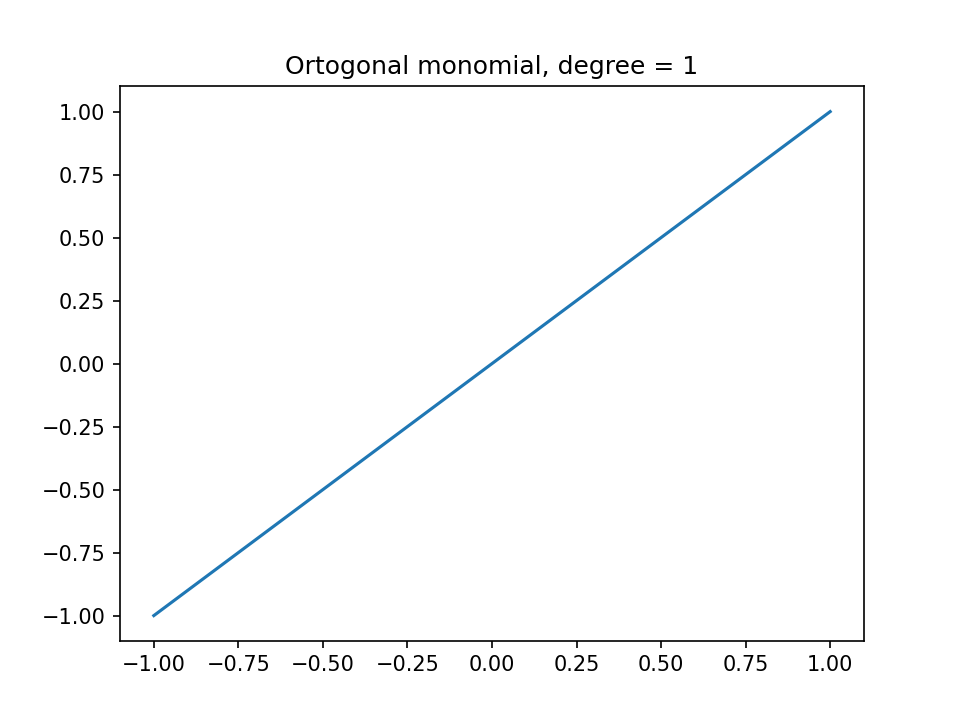

In [46]:
plot_orto_pol(1)

<IPython.core.display.Javascript object>


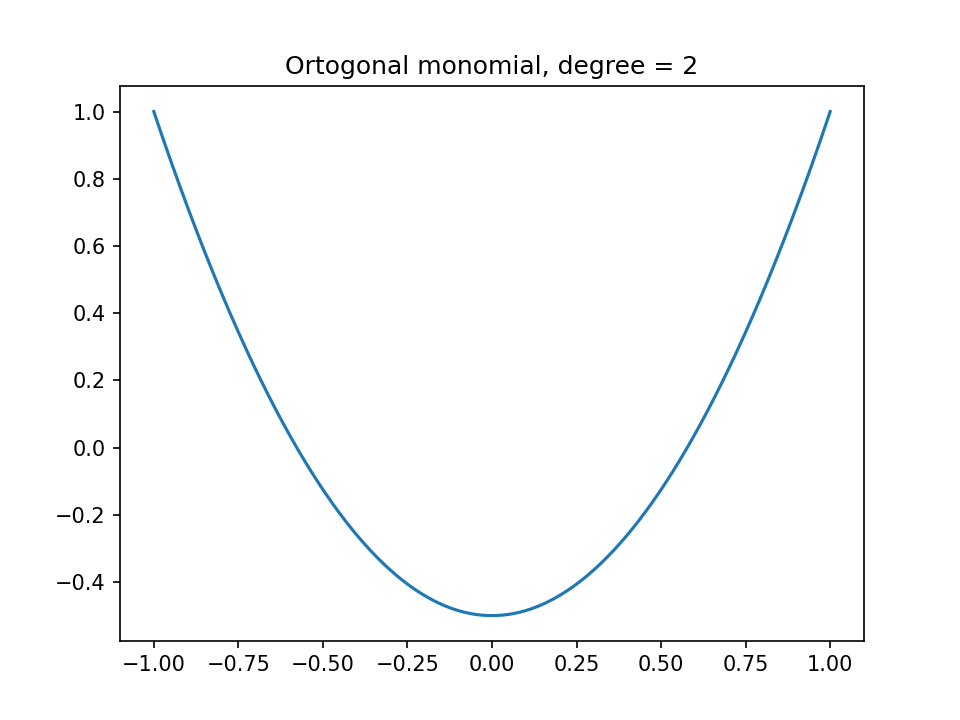

In [47]:
plot_orto_pol(2)

<IPython.core.display.Javascript object>


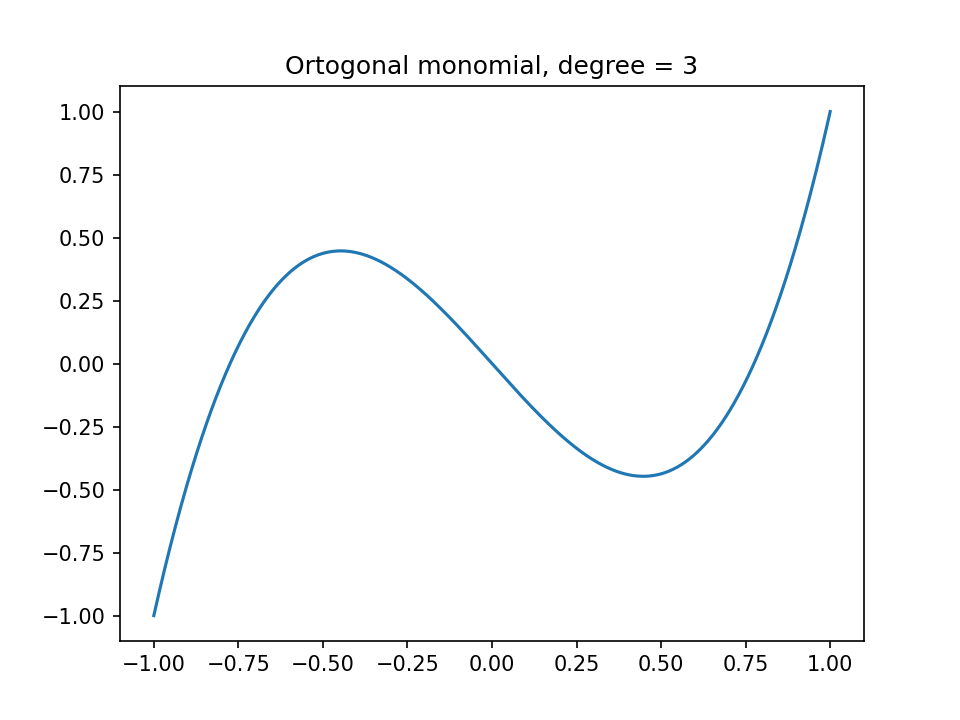

In [48]:
plot_orto_pol(3)

<IPython.core.display.Javascript object>


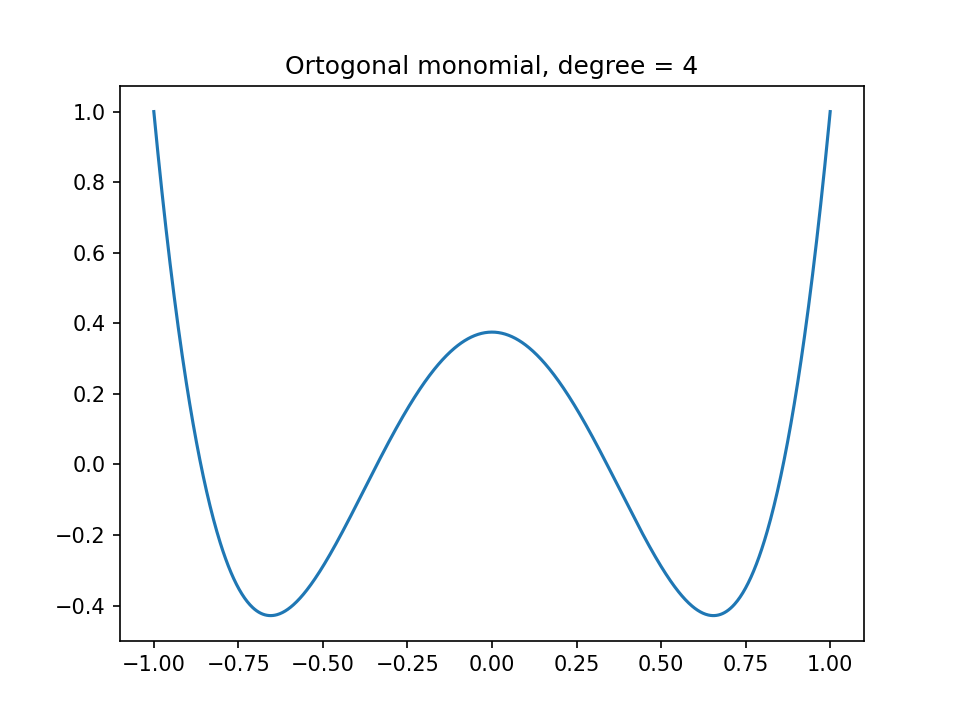

In [49]:
plot_orto_pol(4)

<IPython.core.display.Javascript object>


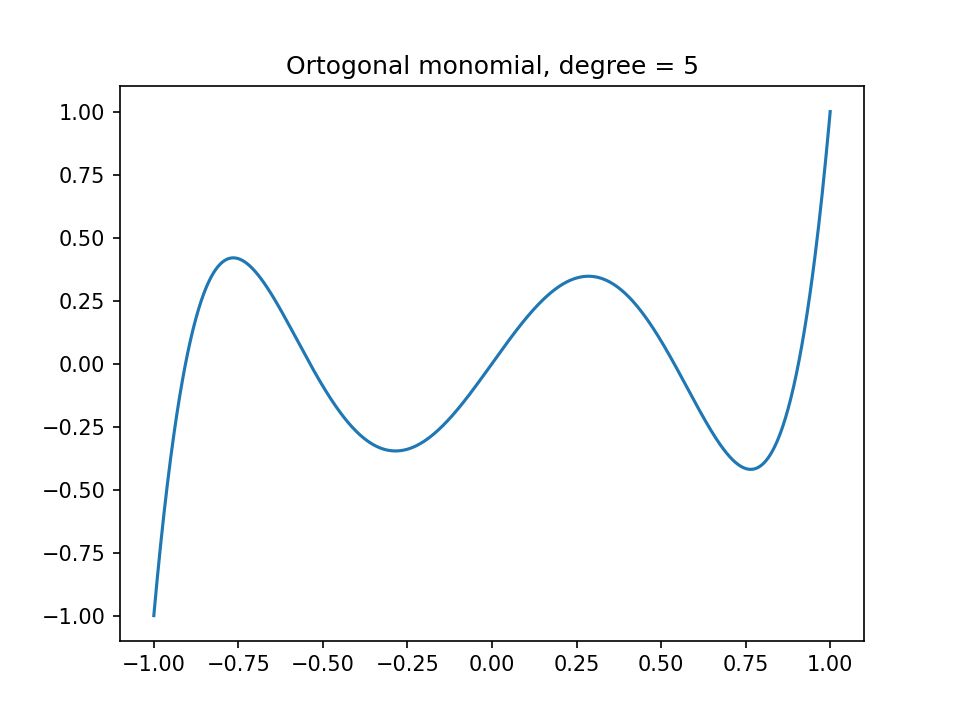

In [50]:
plot_orto_pol(5)

## 3 b)

In [44]:
def roots():
    for k in range(2, 4 + 1):
        poly = get_ortogonal(k)
        print(f'For k = {k}:')
        print(f'My roots: {sorted(poly.r)}')
        print(f'Legendre roots: {scipy.special.roots_legendre(k)[0]}\n')
roots()

For k = 2:
My roots: [-0.5773502691896258, 0.5773502691896256]
Legendre roots: [-0.57735027  0.57735027]

For k = 3:
My roots: [-0.7745966692414834, 0.0, 0.7745966692414833]
Legendre roots: [-0.77459667  0.          0.77459667]

For k = 4:
My roots: [-0.8611363115940536, -0.33998104358485653, 0.3399810435848563, 0.8611363115940531]
Legendre roots: [-0.86113631 -0.33998104  0.33998104  0.86113631]



## 3 c)

Pierwiastki są sobie równe. Wynika to z faktu, że te wielomiany ortogonalne są zdefiniowane dla przedziału $[-1, 1]$, z funkcją wagową $w \equiv 1$, zatem ich pierwiastki są równe odciętym kwadratury Gaussa.

# Zadanie 4

In [45]:
def apply_fun(f, *args):
    return np.array(list(map(f, *args)))

In [46]:
def get_gauss(f, k):
    nodes, weights = scipy.special.roots_legendre(k)
    return np.sum(apply_fun(f, nodes) * np.array(weights))

In [47]:
def get_monomial_diff(method, degree, l, r, *args):
    res = method(lambda x: x**degree, *args)
    prop_res = (r**(degree + 1) - l**(degree + 1)) / (degree + 1)
    return abs(res - prop_res) 

In [50]:
n = 5

In [51]:
def get_gauss_and_monomial_diff(degree):
    return get_monomial_diff(get_gauss, degree, -1, 1, n)

#### Testy przeprowadzam dla 5 punktowej kwadratury Gaussa.

In [52]:
for k in range(1, 40 + 1):
    print(f'k = {k}, Difference = {get_gauss_and_monomial_diff(k)}.')

k = 1, Difference = 2.7755575615628914e-17.
k = 2, Difference = 1.1102230246251565e-16.
k = 3, Difference = 0.0.
k = 4, Difference = 2.220446049250313e-16.
k = 5, Difference = 0.0.
k = 6, Difference = 1.1102230246251565e-16.
k = 7, Difference = 1.3877787807814457e-17.
k = 8, Difference = 1.3877787807814457e-16.
k = 9, Difference = 0.0.
k = 10, Difference = 0.0029318124556221292.
k = 11, Difference = 0.0.
k = 12, Difference = 0.007993574131140407.
k = 13, Difference = 0.0.
k = 14, Difference = 0.013866904133134211.
k = 15, Difference = 0.0.
k = 16, Difference = 0.01963338662847007.
k = 17, Difference = 0.0.
k = 18, Difference = 0.024803465582813572.
k = 19, Difference = 0.0.
k = 20, Difference = 0.02917502573160731.
k = 21, Difference = 0.0.
k = 22, Difference = 0.03271018077444306.
k = 23, Difference = 0.0.
k = 24, Difference = 0.035455590080463534.
k = 25, Difference = 0.0.
k = 26, Difference = 0.03749608074237182.
k = 27, Difference = 0.0.
k = 28, Difference = 0.038929114313980724.
k

Zauważmy, że kwadratura jest w miare dokładna dla $k \leq 2n - 1 = 9$ , co pokrywa się z twierdzeniem z wykładu.

# Zadanie 5

In [53]:
def get_gauss_inter(f, k, a, b):
    g = lambda x: f((b + a) / 2 + (b - a)/ 2 * x)
    return get_gauss(g, k) * (b - a) / 2

In [54]:
def get_gauss_inter_and_monomial_diff(degree, l=-1, r=1):
    return get_monomial_diff(get_gauss_inter, degree, l , r, degree, l, r)

#### Sprawdzam dla każdego monomianu stopień $n = k$ dla przedziału $[3, 7]$.

In [55]:
for k in range(1, 40 + 1):
    print(f'k = {k}, Difference = {get_gauss_inter_and_monomial_diff(k, 3, 7)}.')

k = 1, Difference = 0.0.
k = 2, Difference = 0.0.
k = 3, Difference = 0.0.
k = 4, Difference = 0.0.
k = 5, Difference = 3.637978807091713e-12.
k = 6, Difference = 0.0.
k = 7, Difference = 2.3283064365386963e-10.
k = 8, Difference = 1.862645149230957e-09.
k = 9, Difference = 7.450580596923828e-09.
k = 10, Difference = 4.76837158203125e-07.
k = 11, Difference = 7.152557373046875e-07.
k = 12, Difference = 2.002716064453125e-05.
k = 13, Difference = 3.814697265625e-05.
k = 14, Difference = 0.00048828125.
k = 15, Difference = 0.00048828125.
k = 16, Difference = 0.11328125.
k = 17, Difference = 0.3125.
k = 18, Difference = 0.25.
k = 19, Difference = 39.5.
k = 20, Difference = 148.0.
k = 21, Difference = 736.0.
k = 22, Difference = 10496.0.
k = 23, Difference = 17408.0.
k = 24, Difference = 155648.0.
k = 25, Difference = 4325376.0.
k = 26, Difference = 6815744.0.
k = 27, Difference = 171966464.0.
k = 28, Difference = 637534208.0.
k = 29, Difference = 11945377792.0.
k = 30, Difference = 171798

Dla $k \geq 13$ błąd zaczął znacząco rosnąć. 